# Required Packages:

In [1588]:
import sqlite3

import requests

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

# Dataframe with Voting Information - Table:

#### First, I will add the dataframe to this project.

In [1589]:
df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')

#### My original dataframe is below:

In [1590]:
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


#### Next, I will drop the unnecessary columns and limit the dataframe to movies that have received at least 10,000 votes.

In [1591]:
df = df.drop(columns=['genre_ids', 'id', 'original_language','original_title', 'popularity'])

In [1592]:
new_df = df[df['vote_count'] > 10000]

#### Next, I will create a new column indicating the month that each movie was released

In [1593]:
highest_vote_average['release_month'] = highest_vote_average['release_date']
highest_vote_average['release_month'] = highest_vote_average['release_date'].str[5:7]

#### Finally, I will sort the dataframe by movies that received the highest rating and print the top 100 rows.

In [1594]:
highest_vote_average = highest_vote_average.sort_values('vote_average', ascending = False)
highest_vote_average = highest_vote_average.head(100)

In [1595]:
highest_vote_average

,release_date,title,vote_average,vote_count,release_month
4,2010-07-16,Inception,8.3,22186,07
23811,2018-04-27,Avengers: Infinity War,8.3,13948,04
11032,2014-11-05,Interstellar,8.2,18597,11
2472,1994-06-23,The Lion King,8.2,10160,06
2471,2011-07-15,Harry Potter and the Deathly Hallows: Part 2,8.1,11567,07
...,...,...,...,...,...
14193,2015-06-12,Jurassic World,6.6,14056,06
5186,2012-07-04,The Amazing Spider-Man,6.5,10411,07
11068,2014-07-25,Lucy,6.3,10019,07
17437,2016-08-05,Suicide Squad,5.9,13533,08


In [1596]:
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['02'], 'Feb')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['03'], 'Mar')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['04'], 'Apr')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['05'], 'May')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['06'], 'Jun')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['07'], 'Jul')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['08'], 'Aug')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['09'], 'Sep')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['10'], 'Oct')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['11'], 'Nov')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['12'], 'Dec')

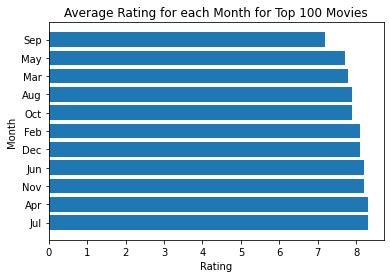

In [1608]:
bar2 = plt.barh(highest_vote_average['release_month'], highest_vote_average['vote_average'])
plt.title('Average Rating for each Month for Top 100 Movies')
plt.xlabel('Rating')
plt.ylabel('Month')
plt.savefig("images/Month_and_Rating")

In [1598]:
df3 = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')

In [1599]:
df3 = df3.drop(columns=['rotten_tomatoes_link', 'movie_info', 'critics_consensus', 'original_release_date', 'authors','actors', 'production_company', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count', 'streaming_release_date', 'runtime'])

In [1600]:
df3 = df3.dropna()

In [1601]:
df3 = df3[df3['genres'].str.contains('Adventure')]

In [1602]:
final_df = pd.merge(df3, highest_worldwide_gross, how='inner', left_on='movie_title', right_on='movie')

In [1603]:
final_df['profit'] = final_df['worldwide_gross'] - final_df['production_budget']

In [1604]:
directors_df = final_df.groupby('directors').mean()

In [1605]:
directors_df = directors_df.sort_values('profit', ascending = False)

In [1606]:
directors_df = directors_df.head(10)

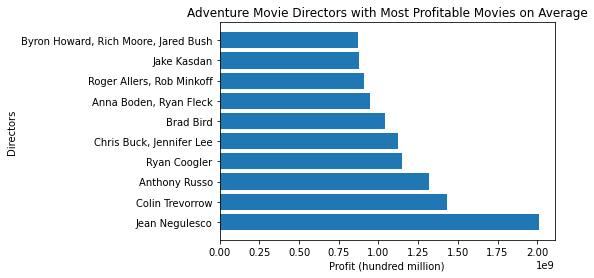

In [1609]:
bar4 = plt.barh(directors_df.index, directors_df['profit'])
plt.title('Adventure Movie Directors with Most Profitable Movies on Average')
plt.xlabel('Profit (hundred million)')
plt.ylabel('Directors')
plt.savefig("images/Directors_and_Profit_for_Adventure_Movies")